In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_analisis = pd.read_excel("df_procesado.xlsx")
df_analisis_cate = pd.read_excel("df_procesado_cate.xlsx")
df_analisis_sinind = df_analisis.drop(["Código NIF"],axis = 1)

In [5]:
df_analisis_sinind.head()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA
0,False,False,3252348.0,False,False,False,False,False,False,False,False,0.538763,2,0.964045,0.192971
1,False,False,14448655.0,False,True,False,False,False,False,False,True,0.455249,1,0.972882,0.033079
2,False,False,7184141.0,False,False,True,False,False,False,False,False,0.831133,3,-0.125041,0.128516
3,False,False,835248.0,False,False,True,False,False,False,False,False,0.589296,2,0.248713,0.080703
4,False,False,53343000.0,False,True,False,False,False,False,False,False,0.406089,0,0.061806,0.053240


## 1. Correlaciones
Antes que nada veamos las correlaciones de las variables seleccionadas. Primero probaremos tanto con Pearson como Spearman e introduciremos todas las variables seleccionadas, para ver si hay correlaciones demasiado elevadas. 

In [6]:
corr_pearson = df_analisis_sinind.corr(method="pearson")
corr_spearman = df_analisis_sinind.corr(method="spearman")

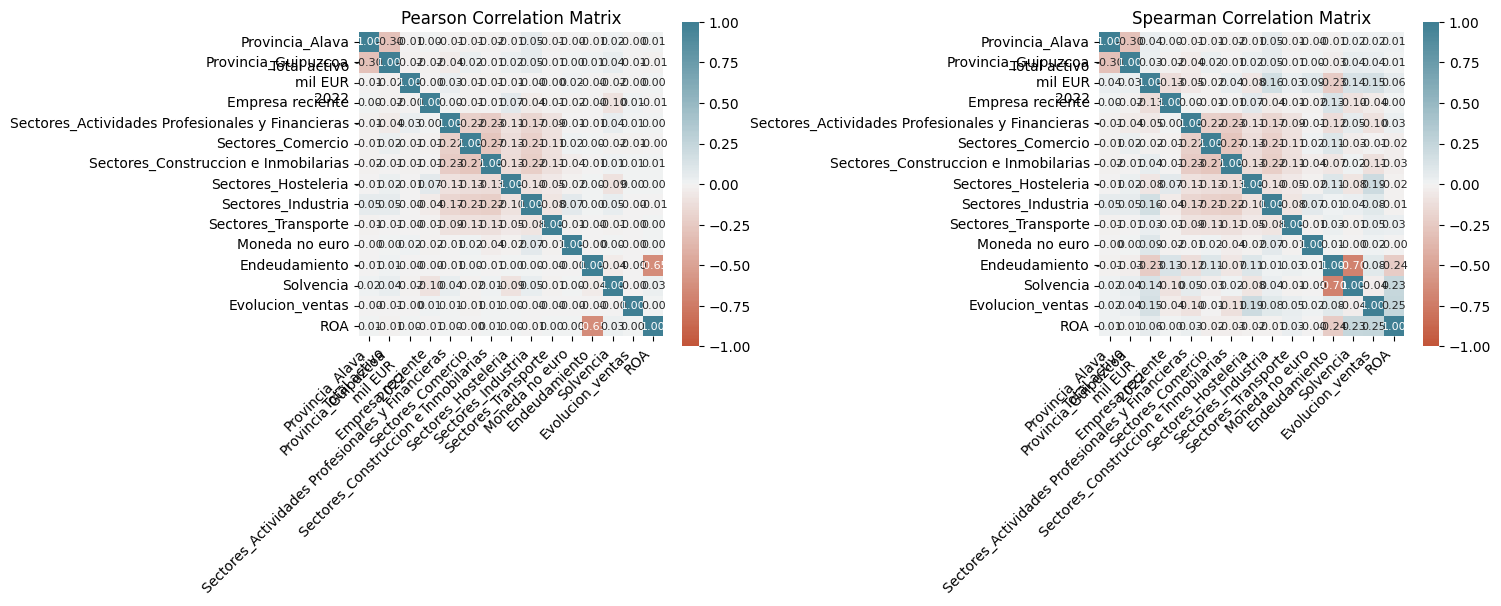

In [7]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

plt.tight_layout()

Que ambas heatmaps sean tan distintas, indica que las correlaciones no son lineales. Así que procederemos a priorizar spearman. Y para verlo más claro, quitaremos las variables con las que hemos hecho one hot encoding.

In [11]:
df_columnas_sin_dummies=df_analisis[['Total activo\nmil EUR\n2022',
       'Empresa reciente', 'Moneda no euro',
       'Endeudamiento', 'Solvencia', 'Evolucion_ventas', 'ROA']]
corr_spearman = df_columnas_sin_dummies.corr(method="spearman")

Text(0.5, 1.0, 'Spearman Correlation Matrix')

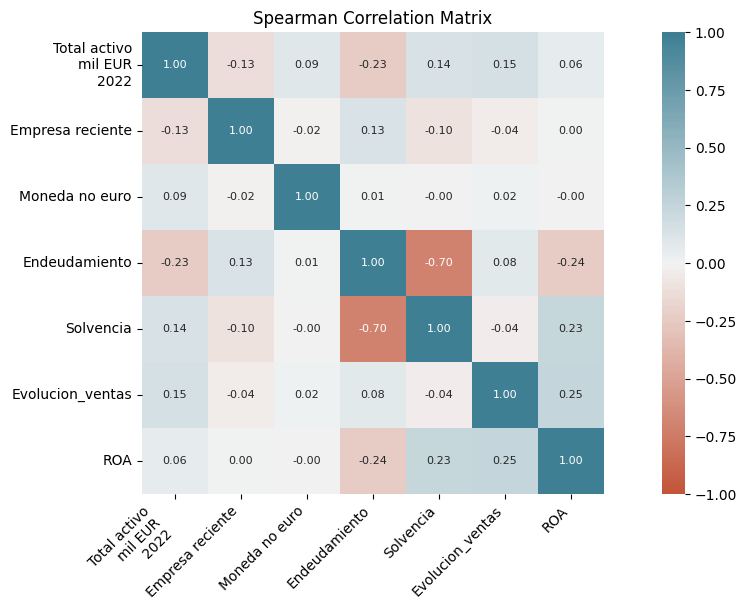

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt=".2f", annot_kws={"size": 8}, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
ax.set_title("Spearman Correlation Matrix")

Aquí, solo podemos observar una correlación fuerte entre el endeudamiento y la solvencia. Sin embargo, esta no es tan elevada como para que convenga eliminar uno de ellos.

Podemos decir que cada variable muestra un aspecto distinto de la empresa. Por lo tanto, para tener una imagen completa de las mismas, conviene tener en cuenta todas ellas.

## 2. Outliers
Ahora analizaremos las outliers en las variables conínuas. Estos pueden distorsionar mucho tanto los modelos con K-means com los modelos de clusterización jerárquica.

In [15]:
df_var_continuas=df_analisis[['Total activo\nmil EUR\n2022', 'Endeudamiento', 'Solvencia', 'Evolucion_ventas', 'ROA']]

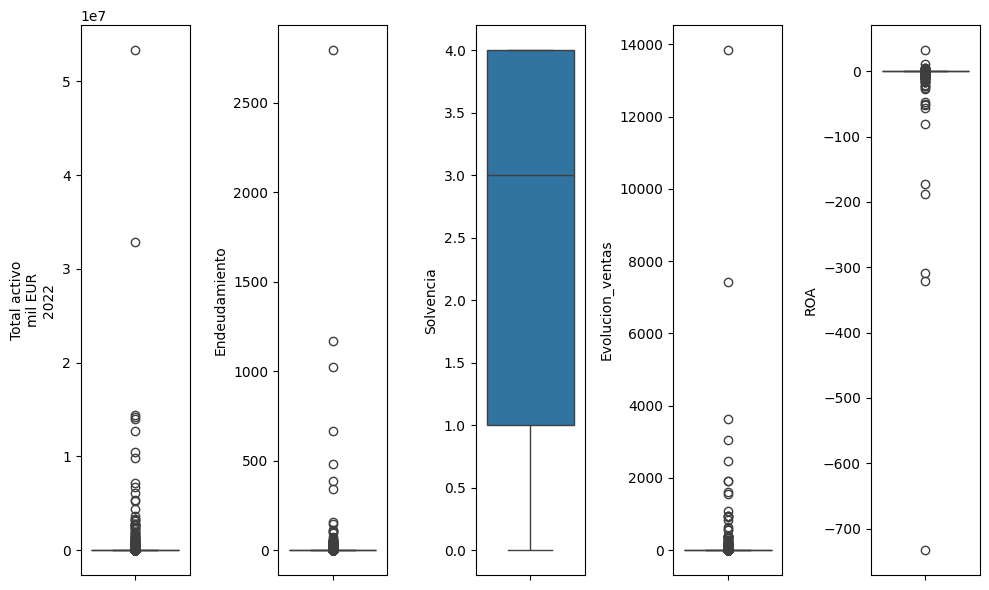

In [19]:
l = df_var_continuas.columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns * 2, 6))

for i in range(number_of_columns):
    plt.subplot(1, number_of_columns, i+1)
    sns.boxplot(df_var_continuas[l[i]])
    plt.ylabel(l[i])

plt.tight_layout()
plt.show()

Como se puede ver, con las outliers no se puede ver nada en claro. Probemos con las variables categorizadas.

In [23]:
df_var_categorizadas=df_analisis_cate[['Endeudamiento_cate', 'Solvencia', 'Evolucion_ventas_cate', 'ROA_cate']]

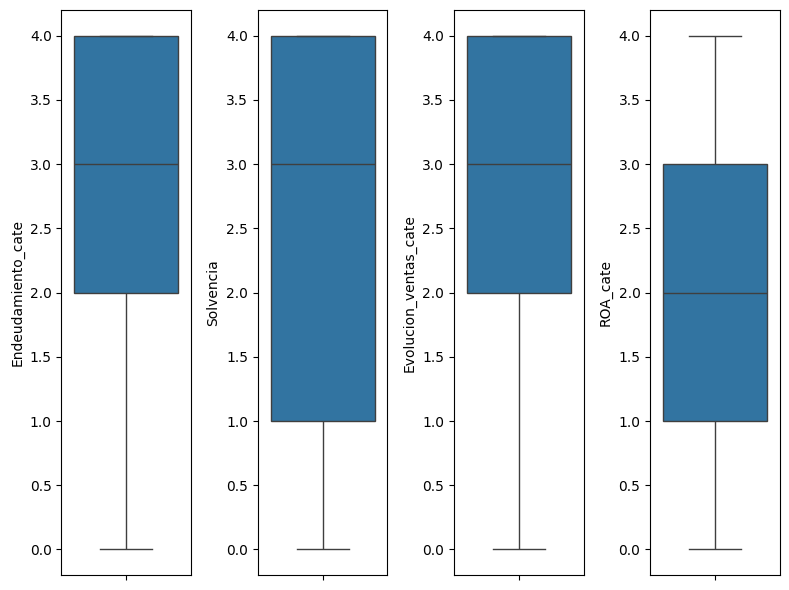

In [27]:
l = df_var_categorizadas.columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns * 2, 6))

for i in range(number_of_columns):
    plt.subplot(1, number_of_columns, i+1)
    sns.boxplot(df_var_categorizadas[l[i]])
    plt.ylabel(l[i])

plt.tight_layout()
plt.show()

Las variables categorizadas nos ofrecen una imagen más simple, pero más clara de la situación. En estos casos, 0 es siempre indicativo de que la empresa anda mal en esa variable, mientras que 4 es el mejor valor posible. Podemos ver que la mayoría de las empresas estudiadas tiene un valor razonablemente bueno, siendo el 3 la media más común.

## 3. Creación de un grupo con los outliers de Total Activo:

Al ser nuestro indicador del tamaño de la empresa, hemos decidido no categorizar esta variable para ninguno de los modelos. Pues consideramos que de otro modo, perderíamos demasiada información. Sin embargo, como podemos ver en la boxplot, esta variable tiene muchos outliers. Por ello, tanto para K-Means como para Jerárquico, pre-segregaremos las empresas más grandes para crear un segmento con ellos solos.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe076d30a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe076d31e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe076d30310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe076d32d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe076d33650>],
 'means': []}

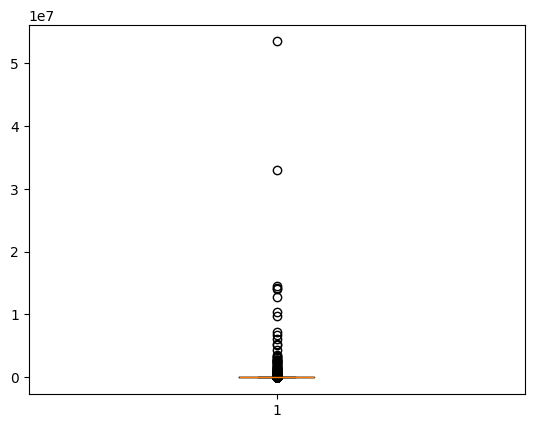

In [28]:
plt.boxplot(df_analisis["Total activo\nmil EUR\n2022"])

In [8]:
df_analisis["Total activo\nmil EUR\n2022"].describe()

count    2.935800e+04
mean     1.365031e+04
std      4.249374e+05
min      2.757000e-02
25%      1.435177e+02
50%      4.328766e+02
75%      1.541833e+03
max      5.334300e+07
Name: Total activo\nmil EUR\n2022, dtype: float64

In [9]:
q1 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 25)
q3 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 75)
iqr = q3 - q1

limite_outliers = q3 + 1.5 * iqr 
limite_outliers

3639.3049787500004

In [10]:
df_analisis_sinout = df_analisis_cate[df_analisis_cate["Total activo\nmil EUR\n2022"]<limite_outliers]

In [11]:
df_analisis_out = df_analisis_cate[df_analisis_cate["Total activo\nmil EUR\n2022"]>=limite_outliers]

In [12]:
df_analisis_out["Cluster kmeans"] = -1

Ahora tenemos dos dataframes, uno con las empresas grandes outliers que formarán su propio cluster y otro con el resto de las empresas. A estas últimas, se les aplicará la modelización K-Means y Jerárquica.

Por otro lado, al no tener problemas con outliers, para OPTICS usaremos el dataframe con todas las variables sin categorizar.

In [13]:
df_analisis_out.describe()

,Total activo\nmil EUR\n2022,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate,Cluster kmeans
count,4.017000e+03,4017.000000,4017.000000,4017.000000,4017.000000,4017.0
mean,9.565463e+04,3.026886,2.573313,2.831964,2.112771,-1.0
std,1.145507e+06,0.971852,1.396376,1.212236,0.916036,0.0
min,3.640199e+03,0.000000,0.000000,0.000000,0.000000,-1.0
25%,5.410071e+03,2.000000,1.000000,2.000000,2.000000,-1.0
50%,8.865737e+03,3.000000,3.000000,3.000000,2.000000,-1.0
75%,2.098917e+04,4.000000,4.000000,4.000000,3.000000,-1.0
max,5.334300e+07,4.000000,4.000000,4.000000,4.000000,-1.0


In [14]:
df_analisis_sinout.describe()

,Total activo\nmil EUR\n2022,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,651.164973,2.642279,2.438302,2.641372,2.074543
std,784.300442,1.164088,1.439558,1.217810,1.168148
min,0.027570,0.000000,0.000000,0.000000,0.000000
25%,119.868500,2.000000,1.000000,2.000000,1.000000
50%,325.922250,3.000000,3.000000,3.000000,2.000000
75%,857.121700,4.000000,4.000000,4.000000,3.000000
max,3637.544480,4.000000,4.000000,4.000000,4.000000


In [15]:
df_analisis_out.to_excel('df_outliers.xlsx', index=False)
df_analisis_sinout.to_excel('df_sin_outliers.xlsx', index=False)